# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [6]:
alucar = pd.read_csv('dados/alucar.csv', sep = ',')

In [7]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [8]:
print('Quantidade de linhas e colunas', alucar.shape)

Quantidade de linhas e colunas (24, 2)


In [9]:
print ('Quantidade de dados nulos', alucar.isna().sum())

Quantidade de dados nulos mes       0
vendas    0
dtype: int64


In [10]:
print ('Quantidade de dados nulos', alucar.isna().sum().sum())

Quantidade de dados nulos 0


In [11]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [12]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [13]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [14]:
import seaborn as sns

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

In [17]:
print(sns.__version__)

0.9.0


<AxesSubplot:xlabel='mes', ylabel='vendas'>

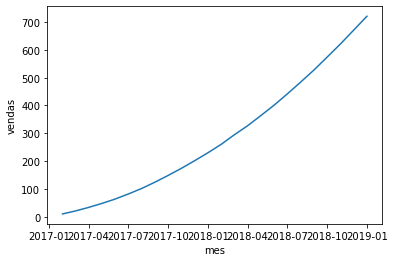

In [19]:
sns.lineplot(x='mes', y='vendas', data=alucar)

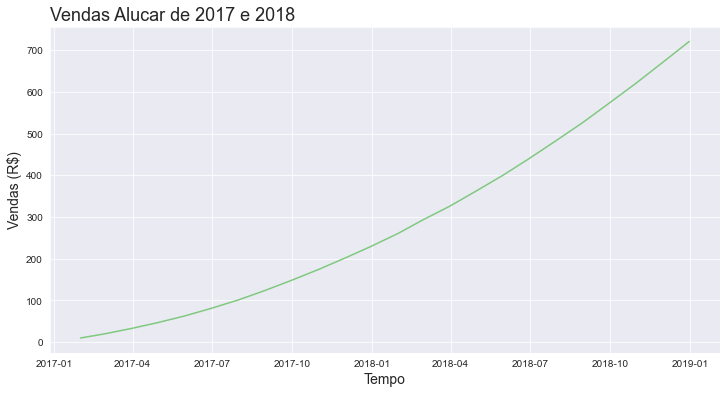

In [27]:
#Paleta de cores
sns.set_palette('Accent')
#Grid: uma marcação de linhas
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [28]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [31]:
alucar['aumento'] = alucar[['vendas']].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


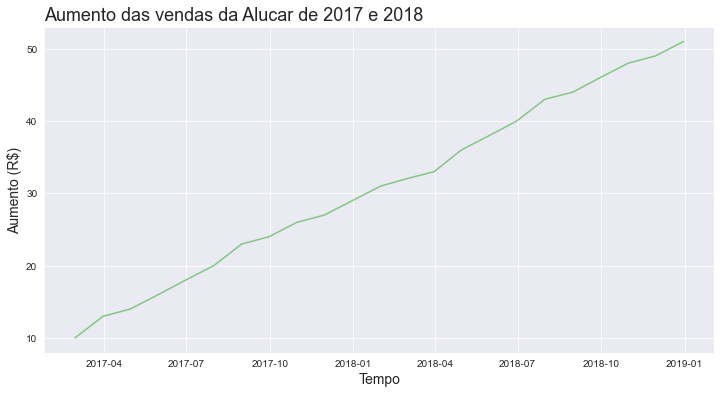

In [33]:
#Paleta de cores
sns.set_palette('Accent')
#Grid: uma marcação de linhas
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento (R$)', fontsize=14)
ax = ax

In [34]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

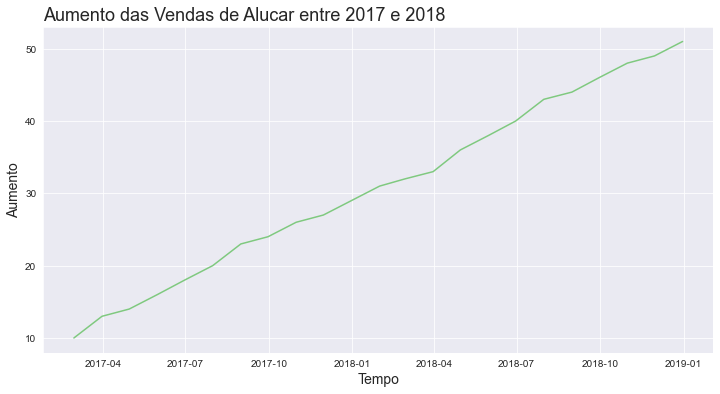

In [36]:
plotar('Aumento das Vendas de Alucar entre 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [38]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


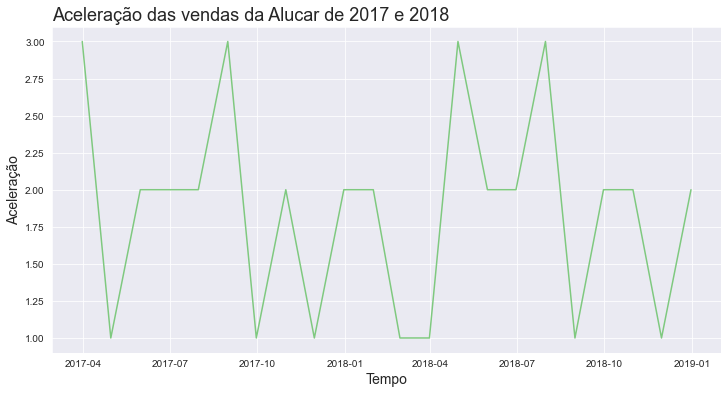

In [39]:
plotar ('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes','aceleracao', alucar)

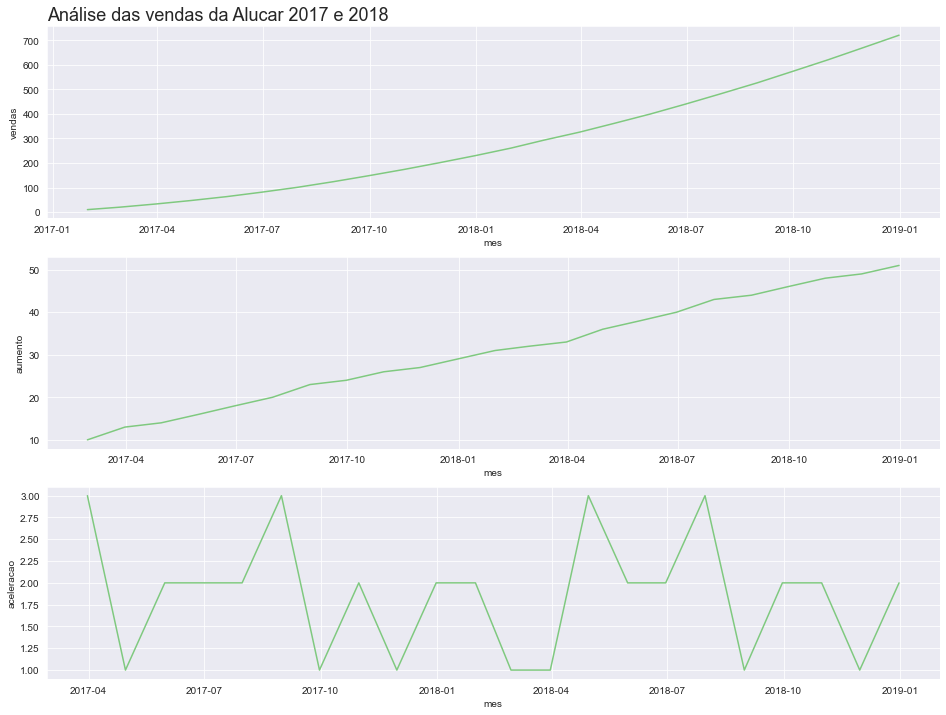

In [40]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [41]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

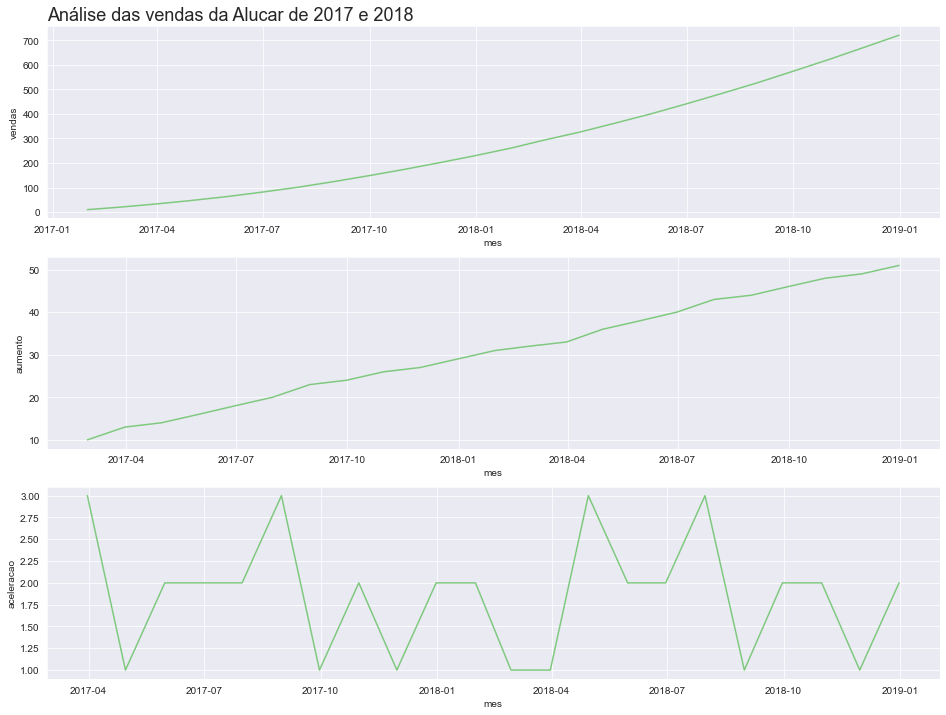

In [42]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

In [43]:
# Autocorrelação
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

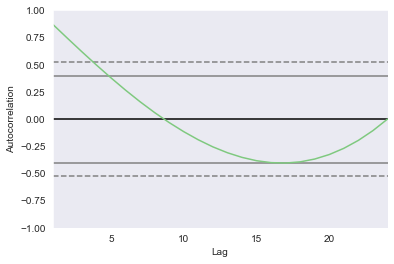

In [44]:
autocorrelation_plot(alucar['vendas'])

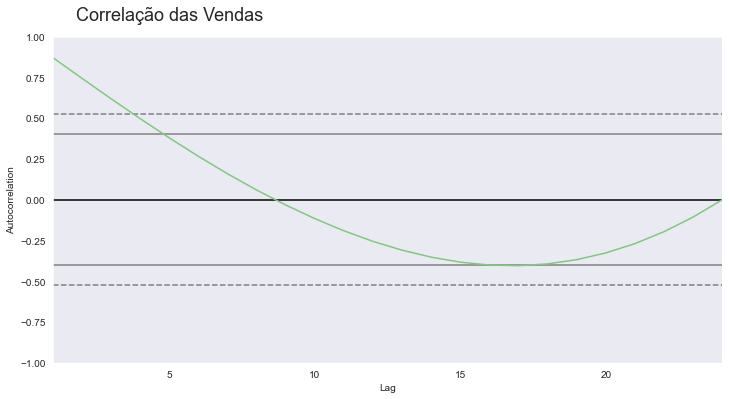

In [46]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(alucar['vendas'])
ax=ax

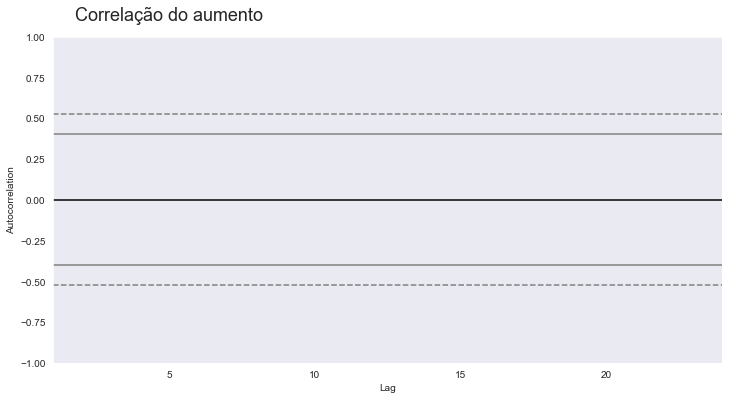

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(alucar['aumento'])
ax=ax
#Errado pq aumento começa no indice 1

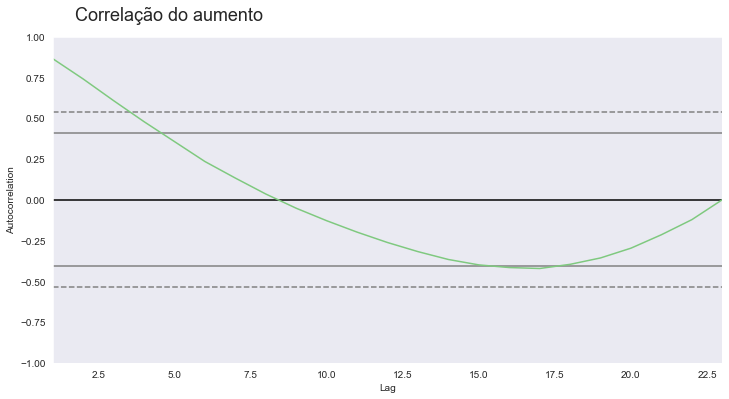

In [48]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

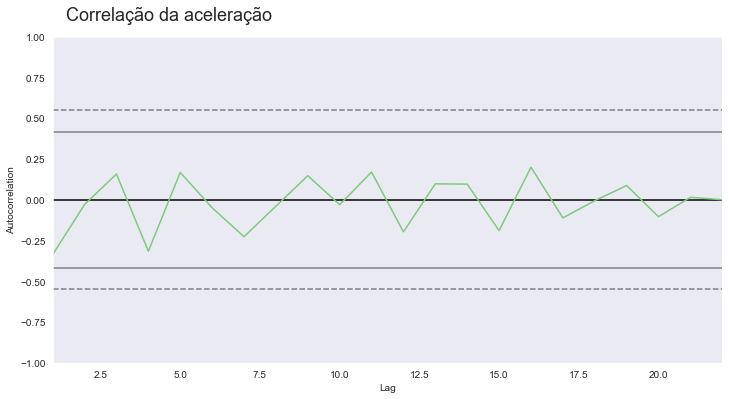

In [49]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax